In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
# to make the figure look nice
import seaborn as sns
custom_params = {
    "axes.grid": True,
    "grid.color":(0.5, 0.5, 0.5, 0.1)
}
sns.set_theme( context='poster', style="ticks", palette="dark", rc=custom_params)

In [2]:
readout = 3e3
raman_drive = 0.1e3
gap = 1e3
cooling_fraction = 0.5

frequency_sweep = np.linspace(0.5, 1, 11)*0.1
amp = np.ones(frequency_sweep.shape[0])
phase = np.zeros(frequency_sweep.shape[0])
freq_cool = frequency_sweep[0]
amp_cool = 1
phase_cool = 0
wait_time_after_cooling = 0.1e3
wait_time_beginning = 0.1e3
length_seq = int(readout + (readout + gap)*len(frequency_sweep))

seq = {'ch1_Dig':[], 'ch2_Dig':[], 'MW':[]}
for j in seq:
    seq[j].append((wait_time_beginning,0))
    if j=='MW':
        seq[j].append((int(cooling_fraction*length_seq/(1-cooling_fraction)), amp_cool, freq_cool,  phase_cool))
        # _x = np.arange(int(cooling_fraction*length_seq/(1-cooling_fraction)), dtype='int')
        # _y = np.cos(2*np.pi*freq_cool*_x/1e3)
        # _array = np.transpose([_x, _y])
        # _tuple = tuple(map(tuple, _array))
        # for l in range(len(_tuple)):
            # seq[j].append(_tuple[l])
    else:
        seq[j].append((int(cooling_fraction*length_seq/(1-cooling_fraction)), 1))
        
    seq[j].append((wait_time_after_cooling,0))
    if j=='ch1_Dig':
        seq[j].append((readout, 1))
    else:
        seq[j].append((readout,0))
    for k in range(len(frequency_sweep)):
        if j=='ch1_Dig':
            seq[j].append((gap, 0))
            seq[j].append((readout, 1))
        elif j=='ch2_Dig':
            seq[j].append((int(gap-raman_drive)/2, 0))
            seq[j].append((raman_drive, 1))
            seq[j].append((int(gap-raman_drive)/2, 0))
            seq[j].append((readout,0))
        else:
            seq[j].append((int(gap-raman_drive)/2, 0))
            seq[j].append((raman_drive, amp[k], np.round(frequency_sweep[k],4), phase[k]))
            # _x = np.arange(raman_drive)
            # _y = np.cos(2*np.pi*frequency_sweep[k]*_x/1e3)
            # _array = np.transpose([_x, _y])
            # _tuple = tuple(map(tuple, _array))
            # for l in range(len(_tuple)):
            #     seq[j].append(_tuple[l])
            seq[j].append((int(gap-raman_drive)/2, 0))
            seq[j].append((readout,0))
    seq[j].append((wait_time_beginning,0))

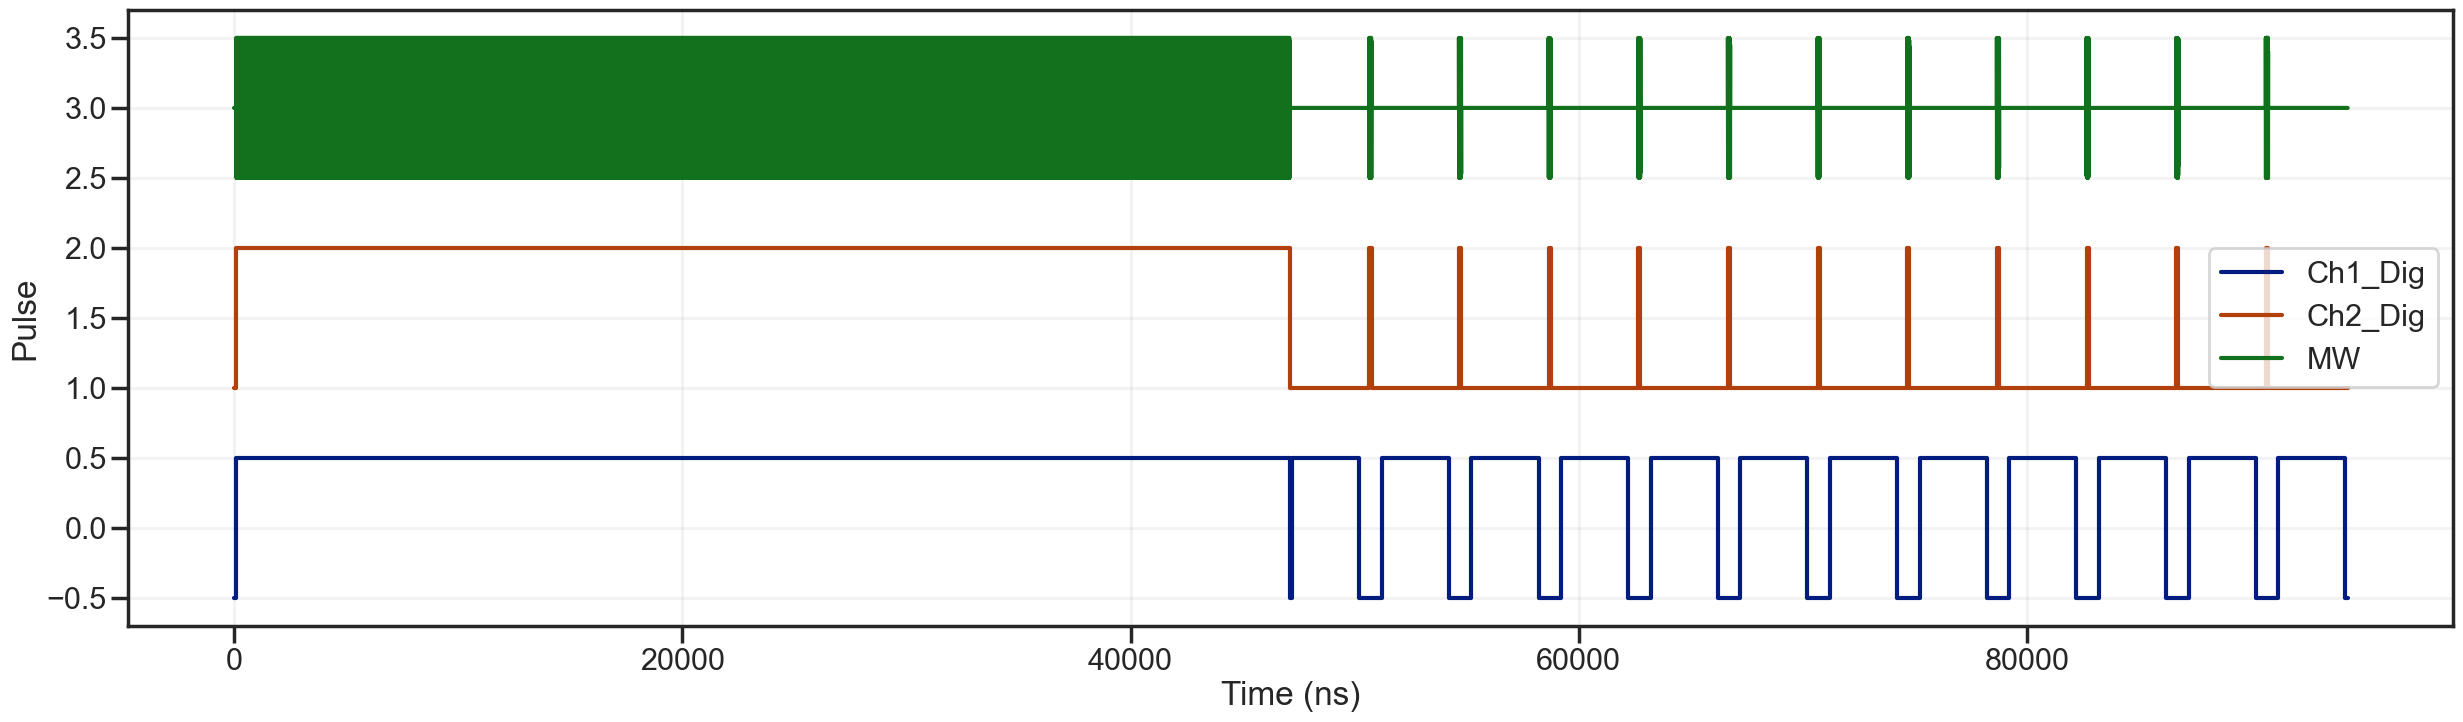

In [ ]:
def plot_seq(seq_array, offset=0, label=None):
    data = []
    cnt = 0
    for j in range(len(seq_array)):
        if len(seq_array[j]) <=2:
            data.append((cnt,seq_array[j][1] ))
            cnt += seq_array[j][0]
            data.append((cnt, seq_array[j][1]))
        else:

            _x = np.arange(int(seq_array[j][0]))
            _y = 0.5*np.cos(2*np.pi*seq_array[j][2]*(_x + seq_array[j][3])) * seq_array[j][1] 
            for k in range(int(seq_array[j][0])):
                data.append((cnt +_x[k], _y[k]))
            cnt += seq_array[j][0]

    plt.plot(np.array(data)[:,0], offset + np.array(data)[:,1] ,'-',label=label)
    # return np.array(data)[:,0]
    # return data

plt.figure(figsize=(30,8))
plot_seq(seq['ch1_Dig'],-0.5,'Ch1_Dig')
plot_seq(seq['ch2_Dig'],1, 'Ch2_Dig')
plot_seq(seq['MW'],3, 'MW')
plt.xlabel('Time (ns)')
plt.ylabel('Pulse')
plt.legend()
# plt.savefig('Sequence_ch1_ch2_mw.png', dpi=100, bbox_inches='tight', facecolor='white')

In [199]:
# to save the data
with open('Sequence_ch1_ch2_mw.pickle', 'wb') as handle:
    pickle.dump(seq, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [200]:
# to read the data
with open('Sequence_ch1_ch2_mw.pickle', 'rb') as handle:
    b = pickle.load(handle)